In [1]:
from scipy.stats import ttest_1samp, mannwhitneyu
import numpy as np
import warnings

warnings.filterwarnings('ignore')
warnings.warn('DelfStack')
warnings.warn('Do not show this message')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('./ab_stats.csv')

In [4]:
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [5]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [7]:
df.shape

(23652, 5)

In [8]:
df[df['ab_group'] == 'A'].count()

revenue          11835
num_purchases    11835
purchase         11835
ab_group         11835
av_site visit    11835
dtype: int64

In [9]:
df[df['ab_group'] == 'B'].count()

revenue          11817
num_purchases    11817
purchase         11817
ab_group         11817
av_site visit    11817
dtype: int64

In [10]:
df[df['av_site visit'] < 0].count()

revenue          468
num_purchases    468
purchase         468
ab_group         468
av_site visit    468
dtype: int64

In [11]:
df['av_site visit'] = df['av_site visit'].abs()

In [12]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.078929
std,9.557730,1.079403,0.142438,3.003975
min,0.000000,0.000000,0.000000,0.001544
25%,0.000000,0.000000,0.000000,5.181204
50%,0.000000,0.000000,0.000000,7.010481
75%,0.000000,0.000000,0.000000,8.864686
max,1303.609284,152.000000,1.000000,22.446822


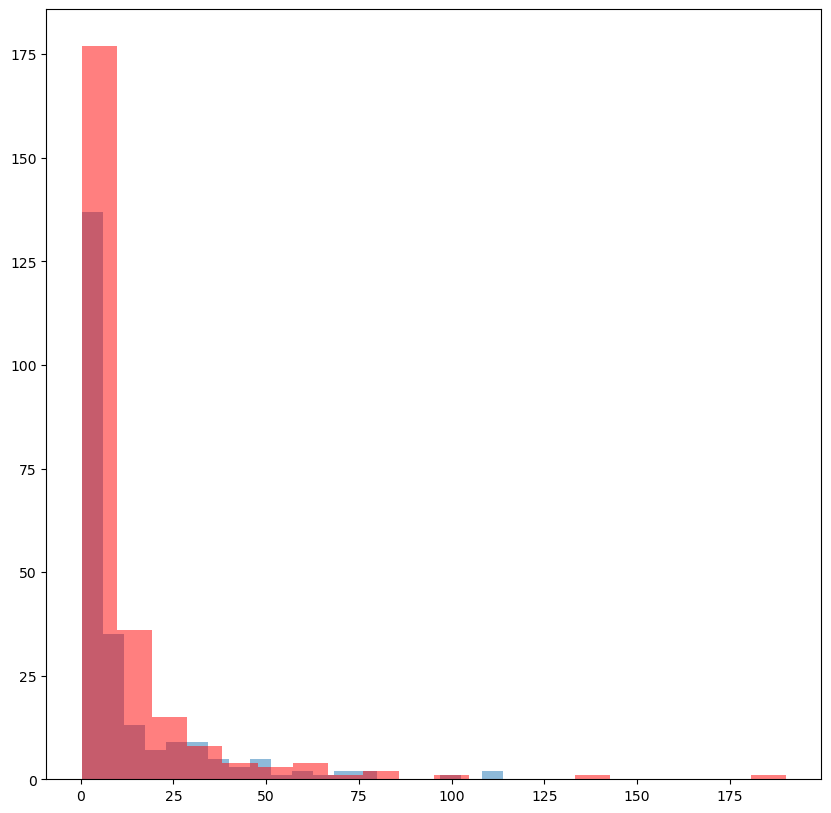

In [13]:
plt.figure(figsize=(10, 10))
control_revenue = df['revenue'][(df['ab_group'] == 'A')&(df['purchase'] == 1)&(df['revenue'] < 200)]
test_revenue =df['revenue'][(df['ab_group'] == 'B')&(df['purchase'] == 1)&(df['revenue'] < 200)]
plt.hist(test_revenue,  bins=20, alpha = 0.5)
plt.hist(control_revenue, color='r', bins=20, alpha = 0.5)

plt.show()

In [14]:
df.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


In [15]:
mw_stats = mannwhitneyu(x=df[(df['ab_group'] == 'A')&(df['purchase'] == 1)]['revenue'].values,
                                                  y=df[(df['ab_group'] == 'B')&(df['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

pvalue=0.8871956616344514, что говорит о том, что статистически значимой разницы ARPPU в двух группах нет. Вывод следующий - выкатывать изменения, в целом, нецелесообразно. Результаты теста и контроля не различаются, оснований отвергнуть нулевую гипотезу нет.